In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("4m_61f_all.csv")
data

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,6,2.109,64083,3389,88.0,8,1588,1144,7,1971,...,0,0,14,10,1,2,0,66,66,Normal
4033548,6,1.880,21303,3389,88.0,9,1646,1148,7,1971,...,2,0,15,10,1,2,0,66,66,Normal
4033549,6,1.779,56493,3389,88.0,9,1646,1148,7,1971,...,2,0,15,10,1,2,0,66,66,Normal
4033550,6,60.647,49707,443,91.0,14,1534,766,14,4678,...,1,0,27,7,0,2,2,66,58,Normal


In [3]:
x = data["NewLabel"].value_counts()
print(x)

Normal            2403724
DDOS               611405
BruteForce         475321
Infiltration       268064
DoS                183477
MalwareActivty      91561
Name: NewLabel, dtype: int64


In [4]:
newLabel = data.iloc[:, -1:]
newLabel

,NewLabel
0,DDOS
1,DDOS
2,DDOS
3,DDOS
4,DDOS
...,...
4033547,Normal
4033548,Normal
4033549,Normal
4033550,Normal


In [5]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['NewLabel'],return_df=True, mapping=[{'col':'NewLabel','mapping':{'Normal':0,'Infiltration':1,'DoS':2,'DDOS':3,'BruteForce':4,'MalwareActivty':5}}])
df_train_transformed = encoder.fit_transform(newLabel)
encoderLabel = df_train_transformed
encoderLabel

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,NewLabel
0,3
1,3
2,3
3,3
4,3
...,...
4033547,0
4033548,0
4033549,0
4033550,0


In [6]:
encode_data = pd.concat([data.iloc[:, :-1],encoderLabel], axis=1)
encode_data

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,3
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,3
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,3
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,3
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,6,2.109,64083,3389,88.0,8,1588,1144,7,1971,...,0,0,14,10,1,2,0,66,66,0
4033548,6,1.880,21303,3389,88.0,9,1646,1148,7,1971,...,2,0,15,10,1,2,0,66,66,0
4033549,6,1.779,56493,3389,88.0,9,1646,1148,7,1971,...,2,0,15,10,1,2,0,66,66,0
4033550,6,60.647,49707,443,91.0,14,1534,766,14,4678,...,1,0,27,7,0,2,2,66,58,0


In [7]:
sort_data = encode_data.sort_values(by=['NewLabel'])

In [8]:
sort_data.reset_index(inplace=True)
sort_data

,index,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,2016775,6,0.773,55872,445,16.0,5,564,286,4,...,0,0,8,5,1,2,0,62,62,0
1,2689027,6,3.849,47036,3389,88.0,13,2173,1459,9,...,2,0,21,12,0,2,1,66,66,0
2,2689028,6,2.919,35055,3389,88.0,11,2090,1484,9,...,0,0,19,12,0,2,1,66,66,0
3,2689029,6,4.113,54399,3389,88.0,14,2228,1460,9,...,2,0,22,12,0,2,1,66,66,0
4,2689030,6,2.057,49864,3389,88.0,9,2287,1789,8,...,0,0,16,11,1,2,0,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,882836,6,0.577,1364,80,7.0,4,224,0,3,...,0,0,6,1,0,2,2,62,60,5
4033548,882837,6,0.666,1366,80,7.0,4,224,0,3,...,0,0,6,1,0,2,2,62,60,5
4033549,882838,6,0.687,1461,80,7.0,4,224,0,3,...,0,0,6,1,0,2,2,62,60,5
4033550,882818,6,16.740,1374,80,7.0,4,224,0,3,...,0,0,6,1,0,2,2,62,60,5


In [9]:
sort = sort_data.iloc[:, 1:]
sort

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,6,0.773,55872,445,16.0,5,564,286,4,394,...,0,0,8,5,1,2,0,62,62,0
1,6,3.849,47036,3389,88.0,13,2173,1459,9,2229,...,2,0,21,12,0,2,1,66,66,0
2,6,2.919,35055,3389,88.0,11,2090,1484,9,2225,...,0,0,19,12,0,2,1,66,66,0
3,6,4.113,54399,3389,88.0,14,2228,1460,9,2229,...,2,0,22,12,0,2,1,66,66,0
4,6,2.057,49864,3389,88.0,9,2287,1789,8,2037,...,0,0,16,11,1,2,0,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033548,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033549,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033550,6,16.740,1374,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [10]:
normal = sort.iloc[0:45000]
normal

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,6,0.773,55872,445,16.0,5,564,286,4,394,...,0,0,8,5,1,2,0,62,62,0
1,6,3.849,47036,3389,88.0,13,2173,1459,9,2229,...,2,0,21,12,0,2,1,66,66,0
2,6,2.919,35055,3389,88.0,11,2090,1484,9,2225,...,0,0,19,12,0,2,1,66,66,0
3,6,4.113,54399,3389,88.0,14,2228,1460,9,2229,...,2,0,22,12,0,2,1,66,66,0
4,6,2.057,49864,3389,88.0,9,2287,1789,8,2037,...,0,0,16,11,1,2,0,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,6,2.037,53595,3389,88.0,5,441,159,4,247,...,2,0,8,3,0,2,1,66,66,0
44996,6,1.493,39434,3389,88.0,6,1299,975,5,355,...,0,0,11,4,0,0,1,0,0,0
44997,6,0.304,41561,445,41.0,3,262,88,2,251,...,0,0,4,2,0,2,0,66,66,0
44998,6,0.294,50942,3389,91.0,3,317,155,1,1233,...,0,0,4,2,0,0,0,0,0,0


In [11]:
sort.iloc[3511670]

protocol               6.000
duration               0.383
src_port           38046.000
dst_port              22.000
ndpi_proto_num        92.000
                     ...    
s_to_c_syn             2.000
s_to_c_fin             2.000
c_to_s_init_win       74.000
s_to_c_init_win       74.000
NewLabel               4.000
Name: 3511670, Length: 61, dtype: float64

In [12]:
sort = sort.drop(sort.index[0:45000])
sort

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
45000,6,0.120,52012,3389,88.0,3,217,43,2,139,...,2,0,4,2,0,2,0,66,66,0
45001,6,1.239,9454,3389,88.0,9,1170,672,6,637,...,2,0,14,9,0,2,0,66,66,0
45002,6,0.057,13910,3389,88.0,1,171,117,1,54,...,0,0,2,1,0,0,0,0,0,0
45003,6,0.312,14708,3389,88.0,2,193,85,2,108,...,0,0,4,1,0,0,1,0,0,0
45004,6,1.733,18056,3389,88.0,10,1225,673,8,745,...,2,0,17,9,0,2,1,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033548,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033549,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033550,6,16.740,1374,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [13]:
Inf = sort.iloc[2403724:2448724]
Inf

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
2448724,6,0.281,53042,80,7.0,4,653,425,3,186,...,0,0,6,2,0,2,0,66,66,1
2448725,6,0.349,53043,80,7.0,4,676,448,3,186,...,0,0,6,2,0,2,0,66,66,1
2448726,6,1.818,52979,80,7.0,8,1398,954,7,1626,...,0,0,14,8,0,2,0,66,66,1
2448727,6,0.635,52957,80,7.0,5,632,350,3,589,...,0,0,7,3,0,2,0,66,62,1
2448728,6,0.288,80,52958,7.0,3,186,0,3,504,...,0,0,6,2,0,1,0,66,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493719,6,0.048,56987,80,7.0,4,642,414,3,186,...,0,0,6,2,0,2,0,66,66,1
2493720,6,0.274,56988,80,7.0,3,353,179,3,703,...,0,0,5,2,0,2,0,66,66,1
2493721,6,0.317,56985,80,7.0,5,936,654,2,132,...,0,0,6,3,0,2,0,66,66,1
2493722,6,0.022,56992,80,7.0,4,664,436,3,186,...,0,0,6,2,0,2,0,66,66,1


In [14]:
sort = sort.drop(sort.index[2403724:2448724])
sort

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
45000,6,0.120,52012,3389,88.0,3,217,43,2,139,...,2,0,4,2,0,2,0,66,66,0
45001,6,1.239,9454,3389,88.0,9,1170,672,6,637,...,2,0,14,9,0,2,0,66,66,0
45002,6,0.057,13910,3389,88.0,1,171,117,1,54,...,0,0,2,1,0,0,0,0,0,0
45003,6,0.312,14708,3389,88.0,2,193,85,2,108,...,0,0,4,1,0,0,1,0,0,0
45004,6,1.733,18056,3389,88.0,10,1225,673,8,745,...,2,0,17,9,0,2,1,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033548,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033549,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033550,6,16.740,1374,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [15]:
DoS = sort.iloc[2671788:2716788]
DoS

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
2761788,6,7.074,43038,80,7.0,5,649,311,3,1178,...,0,0,7,2,1,2,0,74,74,2
2761789,6,7.060,42986,80,7.0,5,715,377,3,868,...,0,0,7,2,1,2,0,74,74,2
2761790,6,7.026,42990,80,7.0,5,751,413,3,868,...,0,0,7,2,1,2,0,74,74,2
2761791,6,7.017,43034,80,7.0,5,831,493,3,1178,...,0,0,7,2,1,2,0,74,74,2
2761792,6,7.050,43032,80,7.0,5,907,569,3,1178,...,0,0,7,2,1,2,0,74,74,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806783,17,6605.131,12925,21,0.0,19,1406,608,0,0,...,0,0,0,0,0,0,0,0,0,2
2806784,17,7071.812,12927,21,0.0,12,888,384,0,0,...,0,0,0,0,0,0,0,0,0,2
2806785,17,5818.547,12931,21,0.0,8,592,256,0,0,...,0,0,0,0,0,0,0,0,0,2
2806786,17,6405.108,12937,21,0.0,7,518,224,0,0,...,0,0,0,0,0,0,0,0,0,2


In [16]:
sort = sort.drop(sort.index[2671788:2716788])
sort

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
45000,6,0.120,52012,3389,88.0,3,217,43,2,139,...,2,0,4,2,0,2,0,66,66,0
45001,6,1.239,9454,3389,88.0,9,1170,672,6,637,...,2,0,14,9,0,2,0,66,66,0
45002,6,0.057,13910,3389,88.0,1,171,117,1,54,...,0,0,2,1,0,0,0,0,0,0
45003,6,0.312,14708,3389,88.0,2,193,85,2,108,...,0,0,4,1,0,0,1,0,0,0
45004,6,1.733,18056,3389,88.0,10,1225,673,8,745,...,2,0,17,9,0,2,1,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033548,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033549,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033550,6,16.740,1374,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [17]:
DDOS = sort.iloc[2855265:2900265]
sort = sort.drop(sort.index[2855265:2900265])
DDOS

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
2990265,17,382.774,28322,22,0.0,20,1480,640,0,0,...,0,0,0,0,0,0,0,0,0,3
2990266,17,625.174,28336,22,0.0,14,1036,448,0,0,...,0,0,0,0,0,0,0,0,0,3
2990267,17,190.114,28784,22,0.0,23,1702,736,0,0,...,0,0,0,0,0,0,0,0,0,3
2990268,17,1320.418,28884,22,0.0,44,3256,1408,0,0,...,0,0,0,0,0,0,0,0,0,3
2990269,17,876.007,28840,22,0.0,41,3034,1312,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035260,17,58914.418,13771,22,0.0,11840,876160,378880,0,0,...,0,0,0,0,0,0,0,0,0,3
3035261,17,6126.809,13941,22,0.0,1697,125578,54304,0,0,...,0,0,0,0,0,0,0,0,0,3
3035262,17,60829.145,14027,22,0.0,12384,916416,396288,0,0,...,0,0,0,0,0,0,0,0,0,3
3035263,17,65210.785,14263,22,0.0,13685,1012690,437920,0,0,...,0,0,0,0,0,0,0,0,0,3


In [18]:
brute = sort.iloc[3466670:3511670]
sort = sort.drop(sort.index[3466670:3511670])
brute

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
3646670,6,6.579,34342,22,92.0,22,3208,1748,23,4563,...,0,0,44,26,0,2,2,74,74,4
3646671,6,3.226,42210,21,1.0,9,629,27,7,546,...,0,0,15,5,0,2,2,74,74,4
3646672,6,5.908,34336,22,92.0,15,2282,1284,20,3169,...,0,0,31,17,3,2,2,74,74,4
3646673,6,2.865,42202,21,1.0,9,629,27,8,612,...,0,0,16,5,0,2,3,74,74,4
3646674,6,5.769,34330,22,92.0,22,3208,1748,25,4659,...,0,0,43,26,3,2,2,74,74,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691665,6,3.326,42384,21,1.0,9,628,26,7,546,...,0,0,15,5,0,2,2,74,74,4
3691666,6,2.242,42382,21,1.0,9,628,26,7,546,...,0,0,15,5,0,2,2,74,74,4
3691667,6,3.502,42380,21,1.0,9,628,26,7,546,...,0,0,15,5,0,2,2,74,74,4
3691668,6,3.085,42378,21,1.0,9,628,26,7,546,...,0,0,15,5,0,2,2,74,74,4


In [19]:
sort

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
45000,6,0.120,52012,3389,88.0,3,217,43,2,139,...,2,0,4,2,0,2,0,66,66,0
45001,6,1.239,9454,3389,88.0,9,1170,672,6,637,...,2,0,14,9,0,2,0,66,66,0
45002,6,0.057,13910,3389,88.0,1,171,117,1,54,...,0,0,2,1,0,0,0,0,0,0
45003,6,0.312,14708,3389,88.0,2,193,85,2,108,...,0,0,4,1,0,0,1,0,0,0
45004,6,1.733,18056,3389,88.0,10,1225,673,8,745,...,2,0,17,9,0,2,1,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033547,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033548,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033549,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
4033550,6,16.740,1374,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [20]:
sort.reset_index(inplace=True)

In [21]:
sort.drop("index",inplace=True,axis=1)

In [22]:
sort

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,6,0.120,52012,3389,88.0,3,217,43,2,139,...,2,0,4,2,0,2,0,66,66,0
1,6,1.239,9454,3389,88.0,9,1170,672,6,637,...,2,0,14,9,0,2,0,66,66,0
2,6,0.057,13910,3389,88.0,1,171,117,1,54,...,0,0,2,1,0,0,0,0,0,0
3,6,0.312,14708,3389,88.0,2,193,85,2,108,...,0,0,4,1,0,0,1,0,0,0
4,6,1.733,18056,3389,88.0,10,1225,673,8,745,...,2,0,17,9,0,2,1,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808547,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
3808548,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
3808549,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
3808550,6,16.740,1374,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [23]:
mal = sort.iloc[3763551:3808551]
sort = sort.drop(sort.index[3763551:3808551])
mal

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
3763551,6,8.868,1208,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
3763552,6,8.861,1210,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
3763553,6,8.882,1212,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
3763554,6,8.922,1260,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
3763555,6,8.874,1256,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808546,6,0.640,1398,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
3808547,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
3808548,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
3808549,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [24]:
sort

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,6,0.120,52012,3389,88.0,3,217,43,2,139,...,2,0,4,2,0,2,0,66,66,0
1,6,1.239,9454,3389,88.0,9,1170,672,6,637,...,2,0,14,9,0,2,0,66,66,0
2,6,0.057,13910,3389,88.0,1,171,117,1,54,...,0,0,2,1,0,0,0,0,0,0
3,6,0.312,14708,3389,88.0,2,193,85,2,108,...,0,0,4,1,0,0,1,0,0,0
4,6,1.733,18056,3389,88.0,10,1225,673,8,745,...,2,0,17,9,0,2,1,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763547,6,8.952,1231,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
3763548,6,8.964,1229,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
3763549,6,8.894,1227,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5
3763550,6,8.983,1245,443,91.0,3,186,0,0,0,...,0,0,0,0,0,3,0,62,0,5


In [25]:
test = pd.concat([normal,Inf,DoS,DDOS,brute,mal])

In [26]:
test.reset_index(inplace=True)

In [27]:
test.drop("index",inplace=True,axis=1)

In [28]:
test

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,6,0.773,55872,445,16.0,5,564,286,4,394,...,0,0,8,5,1,2,0,62,62,0
1,6,3.849,47036,3389,88.0,13,2173,1459,9,2229,...,2,0,21,12,0,2,1,66,66,0
2,6,2.919,35055,3389,88.0,11,2090,1484,9,2225,...,0,0,19,12,0,2,1,66,66,0
3,6,4.113,54399,3389,88.0,14,2228,1460,9,2229,...,2,0,22,12,0,2,1,66,66,0
4,6,2.057,49864,3389,88.0,9,2287,1789,8,2037,...,0,0,16,11,1,2,0,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,6,0.640,1398,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
269996,6,0.577,1364,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
269997,6,0.666,1366,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5
269998,6,0.687,1461,80,7.0,4,224,0,3,180,...,0,0,6,1,0,2,2,62,60,5


In [29]:
x = test["NewLabel"].value_counts()
print(x)

0    45000
1    45000
2    45000
3    45000
4    45000
5    45000
Name: NewLabel, dtype: int64


In [30]:
test.to_csv('test.csv')

In [31]:
sort.reset_index(inplace=True)
sort.drop("index",inplace=True,axis=1)
new_data = sort

In [32]:
#Reduce data
data_minimal = new_data.sample(n = 10000)
data_minimal

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
115260,6,1.659,30617,3389,88.00,10,2012,1460,9,2229,...,2,0,18,12,0,2,1,66,66,0
2351518,6,0.474,56062,445,16.00,5,568,286,4,398,...,0,0,8,5,1,2,0,66,66,0
2027458,6,0.200,49721,443,91.22,10,1059,507,10,5352,...,1,0,19,8,1,2,2,66,66,0
2973206,17,8420.657,18537,22,0.00,2184,161616,69888,0,0,...,0,0,0,0,0,0,0,0,0,3
2001356,6,3.043,61813,3389,88.00,8,1572,1128,7,1971,...,0,0,14,10,1,2,0,66,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211729,6,4.106,57104,3389,88.00,12,2120,1460,10,2283,...,2,0,21,12,0,2,1,66,66,0
2171651,6,0.000,3389,4296,88.00,1,54,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3044919,17,66.312,29718,80,188.00,495,36630,15840,0,0,...,0,0,0,0,0,0,0,0,0,3
3391460,6,4.521,54009,80,7.00,7,2158,1768,2,132,...,0,0,8,5,0,2,0,66,66,4


In [33]:
#Train-test split
x = data_minimal.iloc[:,:-1]
y = data_minimal.iloc[:,-1:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_cwr,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win
1032110,6,3.203,59080,3389,88.0,10,1700,1148,7,1971,...,0,0,0,16,10,1,2,0,66,66
2504116,6,0.372,64241,80,7.0,3,348,174,1,66,...,0,0,0,3,1,0,2,0,66,66
588031,6,0.430,58654,445,16.0,5,568,286,4,398,...,0,0,0,8,5,1,2,0,66,66
3148481,17,2681.086,20402,21,0.0,142,10508,4544,0,0,...,0,0,0,0,0,0,0,0,0,0
123719,6,4.120,10362,3389,88.0,14,2209,1441,9,2229,...,0,2,0,22,12,0,2,1,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810573,6,2.309,50035,3389,88.0,8,1588,1144,7,1971,...,0,2,0,14,10,1,2,0,66,66
835376,6,1.206,50637,3389,88.0,8,1592,1148,7,1971,...,0,2,0,14,10,1,2,0,66,66
2609457,6,0.009,55454,22,92.7,6,690,286,6,464,...,0,0,0,11,4,1,2,0,74,74
1174262,6,0.494,56805,445,16.0,5,655,373,4,400,...,0,0,0,8,5,1,2,0,66,66


In [38]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.01794
Feature: 1, Score: 0.04100
Feature: 2, Score: 0.00669
Feature: 3, Score: 0.12853
Feature: 4, Score: 0.05722
Feature: 5, Score: 0.06308
Feature: 6, Score: 0.01082
Feature: 7, Score: 0.04245
Feature: 8, Score: 0.00667
Feature: 9, Score: 0.00460
Feature: 10, Score: 0.00787
Feature: 11, Score: 0.00665
Feature: 12, Score: 0.00450
Feature: 13, Score: 0.01171
Feature: 14, Score: 0.00305
Feature: 15, Score: 0.00649
Feature: 16, Score: 0.00501
Feature: 17, Score: 0.00222
Feature: 18, Score: 0.01582
Feature: 19, Score: 0.00296
Feature: 20, Score: 0.00355
Feature: 21, Score: 0.00267
Feature: 22, Score: 0.01350
Feature: 23, Score: 0.00331
Feature: 24, Score: 0.00222

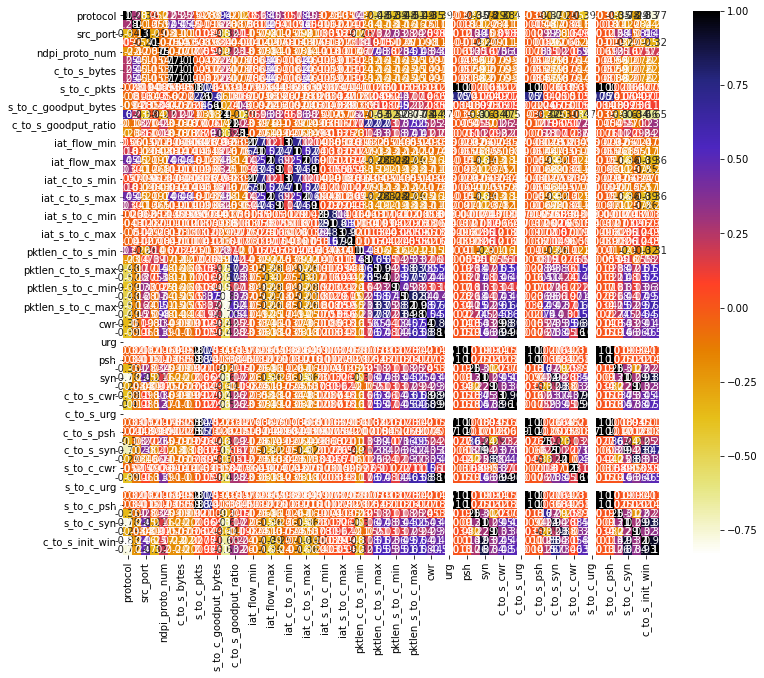

In [39]:
#Colleration matrix 
import seaborn as sns 
plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [40]:
X_train.corr()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_cwr,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win
protocol,1.000000,0.278233,-0.342428,0.051507,-0.219556,0.252355,0.252454,0.252639,-0.027938,-0.079817,...,-0.052367,-0.390701,NaN,-0.031672,-0.034293,-0.350614,-0.776043,-0.292105,-0.833024,-0.771623
duration,0.278233,1.000000,-0.132348,-0.059423,-0.123868,0.448211,0.448175,0.448110,0.001938,-0.016382,...,-0.015054,-0.112418,NaN,0.001845,0.001085,-0.100678,-0.223171,-0.083686,-0.239667,-0.222025
src_port,-0.342428,-0.132348,1.000000,-0.287326,-0.080438,-0.106219,-0.106410,-0.106680,0.013627,0.034021,...,0.049115,0.062768,NaN,0.012471,0.014565,0.281549,0.447540,-0.080915,0.462211,0.473766
dst_port,0.051507,-0.059423,-0.287326,1.000000,-0.074592,-0.053700,-0.053440,-0.053072,-0.008902,-0.029589,...,-0.002649,-0.109290,NaN,-0.011282,-0.011952,-0.033535,-0.266095,-0.090565,-0.248246,-0.319009
ndpi_proto_num,-0.219556,-0.123868,-0.080438,-0.074592,1.000000,-0.077157,-0.077144,-0.077126,0.005490,0.055771,...,0.068784,0.392175,NaN,0.006901,0.013260,0.252028,0.164665,0.074739,0.171905,0.197978
c_to_s_pkts,0.252355,0.448211,-0.106219,-0.053700,-0.077157,1.000000,0.999999,0.999987,-0.004771,-0.019585,...,-0.013645,-0.101803,NaN,-0.004857,-0.005542,-0.091350,-0.202290,-0.076038,-0.217143,-0.201128
c_to_s_bytes,0.252454,0.448175,-0.106410,-0.053440,-0.077144,0.999999,1.000000,0.999993,-0.005095,-0.019821,...,-0.013630,-0.101776,NaN,-0.005177,-0.005863,-0.091412,-0.202365,-0.076064,-0.217214,-0.201190
c_to_s_goodput_bytes,0.252639,0.448110,-0.106680,-0.053072,-0.077126,0.999987,0.999993,1.000000,-0.008068,-0.022015,...,-0.013612,-0.101746,NaN,-0.008145,-0.008833,-0.091537,-0.202461,-0.076171,-0.217307,-0.201274
s_to_c_pkts,-0.027938,0.001938,0.013627,-0.008902,0.005490,-0.004771,-0.005095,-0.008068,1.000000,0.761492,...,0.003851,0.011272,NaN,0.999829,0.999186,0.021196,0.006615,0.031718,0.007466,0.009595
s_to_c_bytes,-0.079817,-0.016382,0.034021,-0.029589,0.055771,-0.019585,-0.019821,-0.022015,0.761492,1.000000,...,0.012897,0.050817,NaN,0.753756,0.742487,0.016975,0.064002,0.048598,0.070531,0.075977


In [41]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

36

In [43]:
corr_features

{'ack',
 'c_to_s_ack',
 'c_to_s_bytes',
 'c_to_s_cwr',
 'c_to_s_ece',
 'c_to_s_fin',
 'c_to_s_goodput_bytes',
 'c_to_s_init_win',
 'c_to_s_psh',
 'c_to_s_syn',
 'ece',
 'iat_c_to_s_avg',
 'iat_c_to_s_max',
 'iat_c_to_s_min',
 'iat_c_to_s_stddev',
 'iat_flow_avg',
 'iat_flow_stddev',
 'iat_s_to_c_avg',
 'iat_s_to_c_max',
 'iat_s_to_c_stddev',
 'pktlen_c_to_s_avg',
 'pktlen_c_to_s_max',
 'pktlen_c_to_s_stddev',
 'pktlen_s_to_c_avg',
 'pktlen_s_to_c_max',
 'pktlen_s_to_c_stddev',
 'psh',
 's_to_c_ack',
 's_to_c_bytes',
 's_to_c_ece',
 's_to_c_fin',
 's_to_c_init_win',
 's_to_c_psh',
 's_to_c_rst',
 's_to_c_syn',
 'syn'}

In [44]:
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)
X_train

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,s_to_c_pkts,s_to_c_goodput_bytes,data_ratio,c_to_s_goodput_ratio,...,pktlen_c_to_s_min,pktlen_s_to_c_min,cwr,urg,rst,fin,c_to_s_urg,c_to_s_rst,s_to_c_cwr,s_to_c_urg
1032110,6,3.203,59080,3389,88.0,10,7,1581,-0.074,67.5,...,54,54,0,0,1,0,0,1,0,0
2504116,6,0.372,64241,80,7.0,3,1,0,0.681,49.9,...,54,66,0,0,0,0,0,0,0,0
588031,6,0.430,58654,445,16.0,5,4,170,0.176,50.3,...,54,54,0,0,1,0,0,0,0,0
3148481,17,2681.086,20402,21,0.0,142,0,0,1.000,43.2,...,74,0,0,0,0,0,0,0,0,0
123719,6,4.120,10362,3389,88.0,14,9,1731,-0.005,65.2,...,54,54,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810573,6,2.309,50035,3389,88.0,8,7,1581,-0.108,72.0,...,54,54,1,0,1,0,0,1,0,0
835376,6,1.206,50637,3389,88.0,8,7,1581,-0.106,72.1,...,54,54,1,0,1,0,0,1,0,0
2609457,6,0.009,55454,22,92.7,6,6,60,0.196,41.4,...,66,66,0,0,1,0,0,0,0,0
1174262,6,0.494,56805,445,16.0,5,4,172,0.242,56.9,...,54,54,0,0,1,0,0,0,0,0


In [45]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.01836
Feature: 1, Score: 0.03134
Feature: 2, Score: 0.01270
Feature: 3, Score: 0.17304
Feature: 4, Score: 0.07386
Feature: 5, Score: 0.08429
Feature: 6, Score: 0.01869
Feature: 7, Score: 0.01268
Feature: 8, Score: 0.00867
Feature: 9, Score: 0.00918
Feature: 10, Score: 0.01152
Feature: 11, Score: 0.00696
Feature: 12, Score: 0.00677
Feature: 13, Score: 0.01658
Feature: 14, Score: 0.10090
Feature: 15, Score: 0.13142
Feature: 16, Score: 0.14598
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.07176
Feature: 19, Score: 0.03603
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.02926
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [51]:
y_pred = knn.predict(X_test)

print(y_test) #real data
print(y_pred) #datas of prediction

         NewLabel
692512          0
1228245         0
2124235         0
719367          0
2453978         1
...           ...
666352          0
912851          0
3611197         4
2170955         0
3180347         3

[2000 rows x 1 columns]
[0 0 0 ... 1 0 3]


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#1799 True Prediction %89.95

[[1242    6    7    2   13    4]
 [   5   57    1    7   52    0]
 [   5    0   50    9    2    0]
 [   5    3    3  283    1    0]
 [  10   51    4    4  149    0]
 [   4    2    0    1    0   18]]
